# __Analysis of medical appointments in Brazil__
This file explores a data set which has information about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Afterwards, an unrelated extra pie chart is included to visualise the data.

In this presentation, you will see the step-by-step code. The code will be explained and also some comments will be given regarding the findings.

It is recommended to use RISE to view this analysis as it has been optimized for it.

__First, let us start by importing the packages we will need and then read the csv file using Pandas.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('no_show_appointments.csv')

__Let's check if we have there are any duplicates or missing values in the data.__

In [2]:
# check number of duplicates
df.duplicated().sum()

0

In [3]:
# count sum of all null values for all columns
df.isnull().sum().sum()

0

__Great! No duplications or missing values. Now we can move forward with the analysis.__

__Next, let's view the column headings as well as the data to check if we need to make any data wrangling.__

In [4]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


__It appears that we will need to make several edits to this dataset to make it easier to work with. First, let's rename the columns to make them a bit easier to work with.__

In [5]:
# change columns names to be easier to work with and fix data types
# list with the updated columns names
updated_columns = ['patient_id','appointment_id','gender','scheduled_day',
                   'appointment_day','age','neighbourhood','scholarship',
                   'hypertension','diabetes','alcoholism','handicap',
                   'sms_received','no_show']
# update columns names in the data frame
df.columns = updated_columns

__The ScheduledDay and AppointmentDay (now scheduled_day and appointment_day respectively) seem to contain the date and time of the appointments. Since we won't need the time, let's remove it from the column to make data easier to work with.__

In [6]:
# make a function to get dates for both scheduled_day and appointment_day columns by removing unecessary characters
def date_cut(df, column):
    df[column] = df[column].apply(lambda x: x[:10])
# apply the function to both scheduled_day and appointment_day columns
date_cut(df,'scheduled_day')
date_cut(df,'appointment_day')
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


__Much better! Now we will be able to analyse this data.__

__Let's start by analysing the data based on gender. To do this, let's make two sub dataframes: one for males and one for females.__

In [7]:
# make a new dataframe, df_gender to have only gender and no_show columns
df_gender = df.loc[:,['gender','no_show']]

# further divide the dataframe above into 2 dataframes, one for males
# and one for females:
df_males = df_gender.query("gender == 'M'")
df_females = df_gender.query("gender == 'F'")

__Now, let's calculate the percentage of show and no show for both males and females.__

In [8]:
# make a function to get show rate for any datafame
def show_percentage(df):
    total_show = df['no_show'].value_counts()['No'] / df.shape[0] * 100
    return total_show

# get show and no show % for males using the function above
appointments_males_show = show_percentage(df_males)
appointments_males_noshow = 100 - appointments_males_show

# get show and no show % for females using the function above
appointments_females_show = show_percentage(df_females)
appointments_females_noshow = 100 - appointments_females_show

__We will plot the results on the next slide. Before we do, think for a moment - which do you think is more unlikely to show up, males or females?__

__Made up your mind? Let's move to the next slide and find out!__

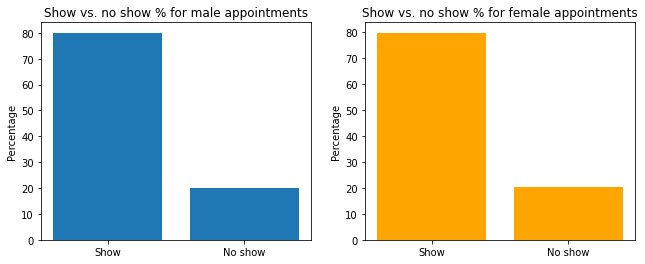

In [9]:
# use subplot in both of the below to print the graphs side by side
# use subplot_adjust to put space between graphs to avoid overlap
# add graph details and plot using data above
plt.tight_layout()
plt.subplot(1,2,1)
plt.subplots_adjust(right=1.5)
plt.title('Show vs. no show % for male appointments')
plt.ylabel('Percentage')
plt.bar(['Show','No show'],[appointments_males_show, appointments_males_noshow]);

# add graph details and plot using data above
plt.subplot(1,2,2)
plt.title('Show vs. no show % for female appointments')
plt.ylabel('Percentage')
plt.bar(['Show','No show'],[appointments_females_show, appointments_females_noshow],color='orange');

__As you saw in the last two plots, they are almost identical! There is a very small difference; 79.7% of the females show up for their appointments while 80.0% of the males do. This means that for being a male or female in Brazil does not significantly affect your chances to go to your appointment. Was that what you expected or was it a surprise?__

__Let's move on to analysing other variables!__

__Are patients more or less likely to go to their appointments if they book it on the same day? Let's find out.__

__To do this, let's add a new row, same_day, which says True if scheduled_day and appointment_day are equal and False if they are not.__

In [10]:
df['same_day'] = df['scheduled_day'] == df['appointment_day']
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,same_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True


__Now, let's make two new sub dataframes: One where the appointment was set up on the same day (In other words, scheduled_day is equal to appointment_day) and the other where the appointment was NOT set up on the same day.__

In [11]:
df_same_day = df.query("same_day == True")
df_not_same_day = df.query("same_day == False")

__Let's check if having scheduling an appointment for the same day affects the chances of the patient going to that appointment.__

__We can do this by checking the percentage of people in our new sub dataframes.__

__First, let's do some calculations. We will reuse the show_percentage function we used before for the below.__

In [12]:
# get show and no show % for same day appointments
appointments_same_day_show = show_percentage(df_same_day)
appointments_same_day_noshow = 100 - appointments_same_day_show

# get show and no show % for appointments scheduled and done in different days
appointments_not_same_day_show = show_percentage(df_not_same_day)
appointments_not_same_day_noshow = 100 - appointments_not_same_day_show

__Now, let's plot the results!__

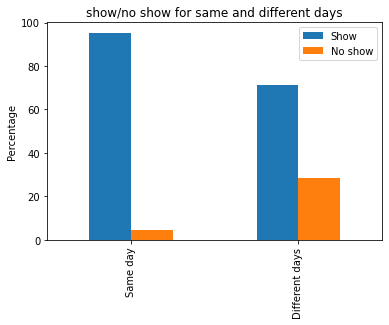

In [13]:
# setup the graph and then plot it
df_days_showups = pd.DataFrame({
    '': ['Same day', 'Different days'],
    'Show': [appointments_same_day_show, appointments_not_same_day_show],
    'No show': [appointments_same_day_noshow, appointments_not_same_day_noshow]
    })
  
df_days_showups.plot(x = '', y = ['Show', 'No show'],
                     kind= 'bar', title = 'show/no show for same and different days',
                     ylabel = 'Percentage');

__Interesting! It seems the vast majority of the people who book an appointment in the same day attend it, while nearly a third of people who schedule their appointments for other days don't go to their appointments.__

__Now, let's check the mean age of the patients in each city. To do this, let's extract the list of all unique cities and get the mean of all of them:__

In [14]:

# get list of neighbourhoods in the dataset
neighbourhood_list = list(df['neighbourhood'].unique())
neighbourhood_mean_ages = []
# get mean age for each neighbourhood by querying all of the cities and then storing the mean age
# for all of them in neighbourhood_mean_ages
for place in neighbourhood_list:
    df_temp = df[df['neighbourhood'] == place]
    temp_mean_age = df_temp['age'].mean()
    neighbourhood_mean_ages.append(round(temp_mean_age,1))

# Conclusion

The data had a few typos and had no missing values or duplications. It was largely ready to analyse and just needed some small editts.
We can conclude the following from the data analysis we have done:
1. There is no difference between males and females attendance if we look at all of the appointments.
2. Patients are very likely to attend the appointments if they scheduled it during the same day, and have approximately a 30% chance of NOT attending the appointments if they did not schedule it during the same day

It is important to note that that this data had some limitations:
1. The whole data set was for appointments in Brazil; other countries may have different results.
2. The data set only included appointments made in 2016. It is possible that upon analysing other years there would be a difference in the results of the anaylsis.

Finally, the data could be analysed even further with more information regarding the patients such as their education level or incomes.

__The analysis of data in regards to whether or not patients show up to their appointments is now over.__

__The next part uses some further plots to further explore the data.__

__Now, let's check the mean age of the patients in each city. To do this, let's extract the list of all unique cities and get the mean of all of them:__

In [15]:
# get list of neighbourhoods in the dataset
neighbourhood_list = list(df['neighbourhood'].unique())
neighbourhood_mean_ages = []

# get mean age for each neighbourhood by querying all of the cities and then storing the mean age
# for all of them in neighbourhood_mean_ages
for place in neighbourhood_list:
    df_temp = df[df['neighbourhood'] == place]
    temp_mean_age = df_temp['age'].mean()
    neighbourhood_mean_ages.append((round(temp_mean_age,1) , place))
    
# get number of neighbourhoods
len(neighbourhood_list)

81

__Hmm. That went without problems, but there are too many neighbourhoods to plot in one graph. Let's take the top 10 neighbourhoods in terms of mean patient age.__

In [16]:
# sort our list to find the top 10 neighbourhoods with highest mean patient age
neighbourhood_mean_ages.sort(reverse=True)

# edit the list so it only has the top 10 neighbourhoods
neighbourhood_mean_ages = neighbourhood_mean_ages[:10]

# break the list into two lists, one for mean patient age and one for location so we can plot them
mean_ages = []
neighbourhoods = []
for element in neighbourhood_mean_ages:
    mean_ages.append(element[0])
    neighbourhoods.append(element[1])

__All set! We just need to plot the data now.__

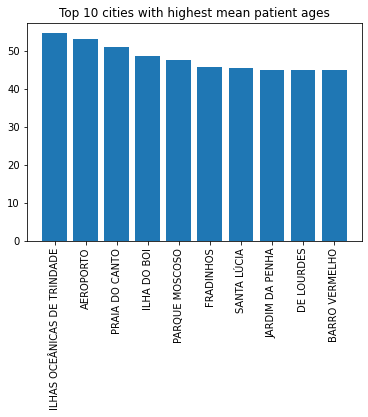

In [17]:
# plot mean patient ages with their respective neighbourhoods
plt.bar(neighbourhoods, mean_ages)
plt.title('Top 10 cities with highest mean patient ages')
# rotate x axis labels by 90 degrees so they can be read
plt.xticks(rotation = 90)
plt.show()

__Let's modify our data by adding a new column which shows whether a patient has a health condition (diabetes or hyper tension or both).__

In [18]:
# add a health_condition column, which has a value bigger than 0 if patient has no
# health conditions, 1 if he has diabetes or hypertension, and 2 if he has both.

df['health_condition'] = df['hypertension'] + df['diabetes']

# add two sub dataframes, one which contains patients which have hypertension or
# diabetes or both, and the other which contains patients who have neither.
df_health_condition_true = df.query('health_condition > 0')
df_health_condition_false = df.query('health_condition == 0')

__Now, let's use these new dataframes to plot the proportion of people who have at at least one health condition:__

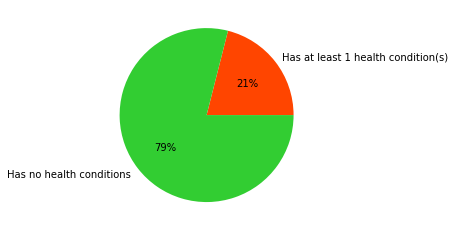

In [19]:
# get number of patients with and without health conditions
patients_with_health_conditions = df_health_condition_true.shape[0]
patients_without_health_conditions = df_health_condition_false.shape[0]

# setup the array for the pie chart, then plot the pie chart
data = np.array([patients_with_health_conditions, patients_without_health_conditions])
pie_labels = ['Has at least 1 health condition(s)', 'Has no health conditions']
pie_colors = ['orangered','limegreen']
plt.pie(data, labels = pie_labels, colors = pie_colors, autopct='%1.0f%%');

__This marks the end of this project! Hope you enjoyed it.__